# Signals and Systems for Dummies, Chapter 11

In [9]:
from pathlib import Path
import sys

if (root := str(Path().resolve().parent.parent / "python")) not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from rfdsppy import continuous_time as conttime, plotting
# import mplcursors

from importlib import reload

reload(conttime)
reload(plotting)

%matplotlib ipympl
# %matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


In [39]:
np.concatenate((h.real, h.imag)).shape

(1024,)

Text(0.5, 0.98, 'DTFT of Brickwall LPF, ntaps=128, wc=1.571')

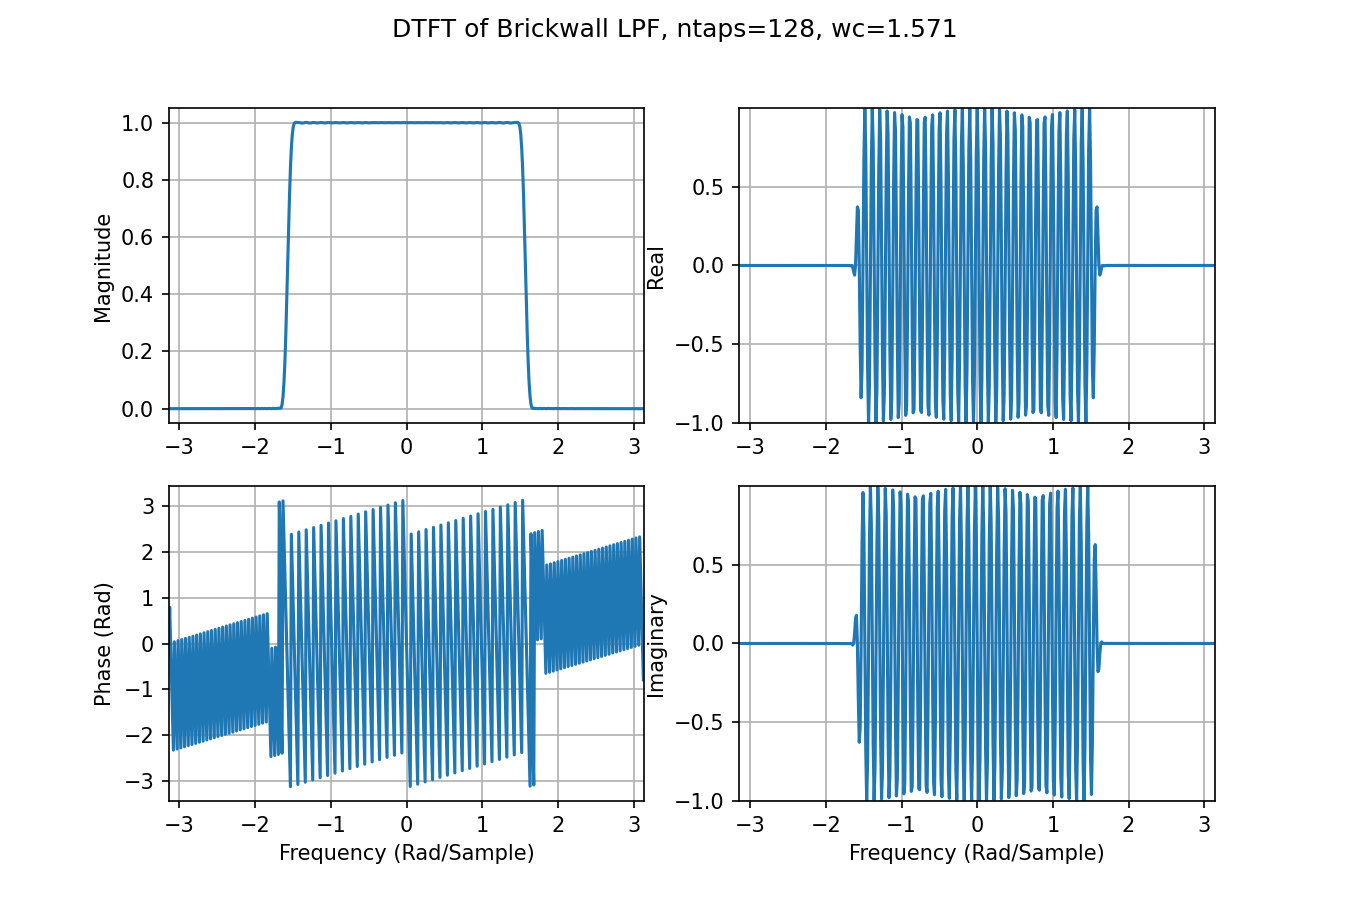

In [ ]:
# First-order LPF/decaying exponential
a = 0.8
bk = 1
ak = [1, -a]

# Rectangular window
# M = 8
# bk = np.ones(M)
# ak = 1
# title = f"DTFT of Rectangular Window, M={M}"

# Approximate brick-wall LPF
wc = np.pi/2
ntaps = 2**7
bk = signal.firwin2(ntaps, [0, wc/np.pi, wc/np.pi, 1], [1, 1, 0, 0])
ak = 1

# ntaps = ntaps + 1 if not (ntaps % 2) else ntaps
# n = np.arange(-np.floor(ntaps/2), np.floor(ntaps/2))
# bk = np.sin(wc*n)/np.pi/n
# bk[n == 0] = wc/np.pi
# ak = 1
title = f"DTFT of Windowed Brickwall LPF, ntaps={ntaps}, wc={round(wc,3)}"

w, h = signal.freqz(bk, ak, worN=np.linspace(-np.pi, np.pi, 512+1)[:-1])

assert w.size >= bk.size, "FFT size is smaller than coefficient size"

h_components = np.concatenate((h.real, h.imag))
ymin = h_components.min()
ymax = h_components.max()

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, dpi=150, figsize=(9, 6))
axs[0, 0].plot(w, np.abs(h))
axs[0, 0].set_ylabel("Magnitude")
axs[0, 0].grid()
axs[0, 0].set_xlim(left=-np.pi, right=np.pi)
axs[0, 0].tick_params(labelbottom=True)
axs[1, 0].plot(w, np.angle(h))
axs[1, 0].grid()
axs[1, 0].set_ylabel("Phase (Rad)")
axs[1, 0].set_xlabel("Frequency (Rad/Sample)")
axs[0, 1].plot(w, h.real)
axs[0, 1].set_ylabel("Real")
axs[0, 1].set_ylim(bottom=ymin, top=ymax)
axs[0, 1].grid()
axs[0, 1].tick_params(labelbottom=True)
axs[1, 1].plot(w, h.imag)
axs[1, 1].grid()
axs[1, 1].set_ylabel("Imaginary")
axs[1, 1].set_xlabel("Frequency (Rad/Sample)")
axs[1, 1].set_ylim(bottom=ymin, top=ymax)
fig.suptitle(title)

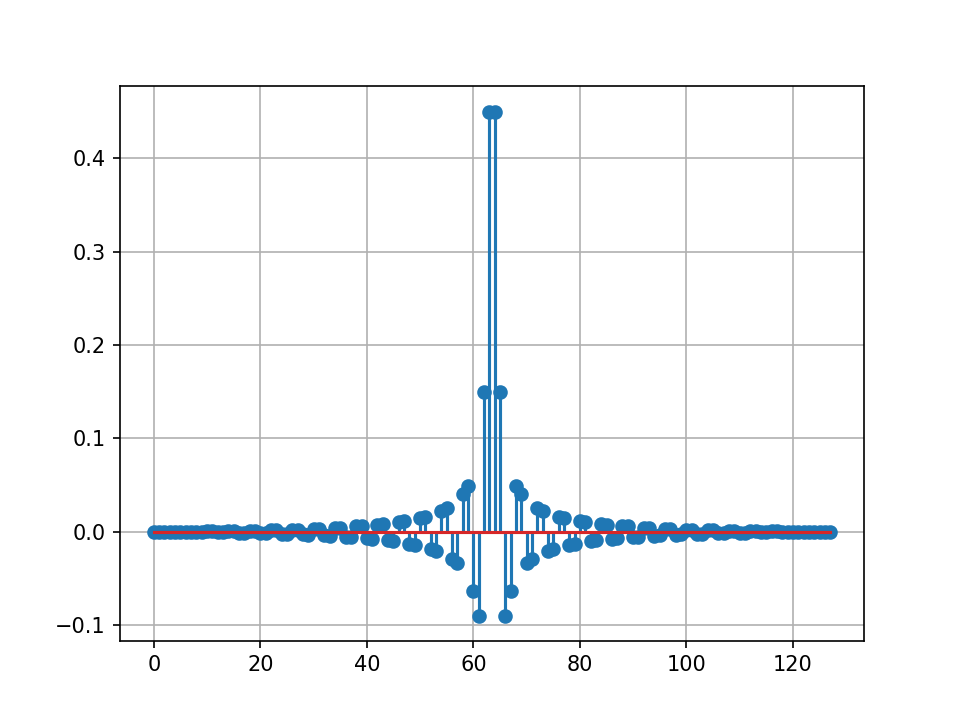

In [56]:
fig, axs = plt.subplots(dpi=150)
axs.stem(bk)
axs.grid()